# Honey Production in US

In this project, I try to show how linear regression works of real-world data.

As we may have already heard, the honeybees are in a precarious state right now. We may have seen articles about the decline of the honeybee population for various reasons. We want to investigate this decline and how the trends of the past predict the future for the honeybees.

__Note:__ All the tasks can be completed using Pandas or NumPy. Pick whichever one we prefer.


In [1]:
# Nececessary import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

## Check out the Data

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")

We have loaded in a DataFrame for you about honey production in the United States from Kaggle. It is called df and has the following columns:

    1.state
    2.numcol
    3.yieldpercol
    4.totalprod
    5.stocks
    6.priceperlb
    7.prodvalue
    8.year
Use .head() to get a sense of how this DataFrame is structured.

In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
# Summary Statistics
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


For now, we care about the total production of honey per year. Use the __.groupby()__ method provided by pandas to get the mean of __totalprod per year.__

Store this in a variable called __prod_per_year.__

In [7]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


Create a variable called X that is the column of years in this prod_per_year DataFrame.

After creating X, we will need to reshape it to get it into the right format.

In [8]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

Create a variable called y that is the totalprod column in the prod_per_year dataset.

In [9]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

Using plt.scatter(), plot y vs X as a scatterplot.

Display the plot using plt.show().

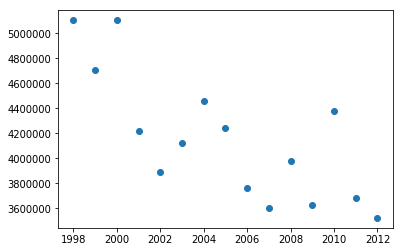

In [10]:
plt.scatter(X, y)
plt.show()

## Create and Fit a Linear Regression Model
Create a linear regression model from scikit-learn and call it regr.

Use the LinearRegression() constructor from the linear_model module to do this.

In [11]:
regr = linear_model.LinearRegression()

# Fit the model to the data by using .fit(). 
# we can feed X into our regr model by passing it in as a parameter of .fit().
regr.fit(X, y)

# After you have fit the model, print out the slope of the line (stored in a list called regr.coef_) 
# and the intercept of the line (regr.intercept_).
regr.coef_[0]

-88303.18915238194

In [12]:
regr.intercept_

181208083.1073298

Create a list called y_predict that is the predictions your regr model would make on the X data.

In [13]:
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

Plot y_predict vs X as a line, on top of your scatterplot using plt.plot().

Make sure to call plt.show() after plotting the line.

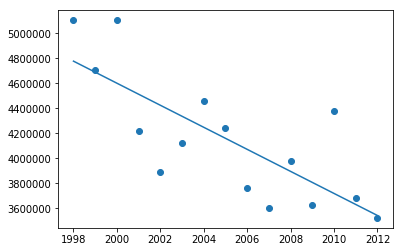

In [14]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

## Predict the Honey Decline
So, it looks like the production of honey has been in decline, according to this linear model. Let's predict what the year 2050 may look like in terms of honey production.

Our known dataset stops at the year 2013, so let's create a NumPy array called X_future that is the range from 2013 to 2050.

In [15]:
X_future = np.array(range(2013, 2051))


In [16]:
# After creating that array, we need to reshape it for scikit-learn.
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050]])

We can think of reshape() as rotating this array. Rather than one big row of numbers, X_future is now a big column of numbers — there's one number in each row.

reshape() is a little tricky! It might help to print out X_future before and after reshaping.


Create a list called future_predict that is the y-values that your regr model would predict for the values of X_future.

In [17]:
future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919,  186545.34494683])

Plot future_predict vs X_future on a different plot.

How much honey will be produced in the year 2050, according to this?

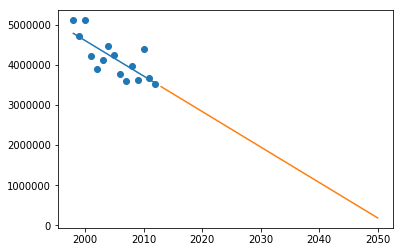

In [18]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()